# Artificial Neural Networks
### `! git clone https://www.github.com/ds4e/ann`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
   
def graph_layer_weights(W,layer):
    """ Function for plotting NN layers. """
    # Create graph
    G = nx.Graph()
    # Construct edges
    edges = []
    for i in range( (W[layer].shape)[0] ):
        for j in range( (W[layer].shape)[1] ):
            edges.append( ['i'+str(i),'h'+str(j), W[layer][i][j]] )
    # Add weighted edges
    G.add_weighted_edges_from(edges)
    # Position nodes using bipartite graph layout
    top = nx.bipartite.sets(G)[0]
    pos = nx.bipartite_layout(G,top)
    # Extract edge weights for visualization
    weights = nx.get_edge_attributes(G, 'weight')
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
    # Draw edges with varying line width based on weight
    for edge, weight in weights.items():
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=weight * 5,alpha=.2)
    # Display plot
    plt.title("Neural Network Weights: Layer "+str(layer)+' to '+str(layer+1))
    plt.axis('off')
    plt.show()

## Artificial Neural Networks
- One of the challenges of our existing models is that we often struggle to "push" them to utilize the data more intensively
- To be specific, we'll look at the **multi-layer perceptron**, or MLP. This is a pretty basic version of a neural network that works well for predictive analytics tasks like the kind we focus on
- In some ways, we did a lot of the hard work with the lecture on Logistic Regression/Gradient Descent
- You can use aNN for classification, regression, and unsupervised learning
- If you have lots of feature-rich data with spatial/temporal correlation, aNN will work great; if you do not, the previous tools will dominate

## From Logistic Regression to Neural Nets
- What is a brain?
- Stimulus occurs: You experience a sight/sound/smell/taste/touch
- The stimulus causes a signal that reaches your brain
- Neurons fire in response and you experience memories/thoughts/etc., or you don't even notice the signal was received
- This process is noisy: Sometimes a smell like cinnamon catchs your attention and reminds you of a childhood memory; sometimes it doesn't
- The premise of an **artificial neural network** is to use this architecture of signal/response to build a machine intelligence
- Artificial neural networks mimic the structure of the brain to mimic the function of human intelligence
- The entry-level model of a neuron is the Logistic Regression model (i.e. a multilayer perceptron with no hidden layers, just input and output)

# Classification with the Multilayer Perceptron

## Starting with a Single Layer Perceptron
- Let's start by writing out the model, then backtrack to talk over what it all means:
    1. There is an **input layer**, $x$, that represents the data coming in, $x = (x_1, ..., x_L)$
    2. There is a **hidden layer** comprised of $K$ **hidden nodes**, $(z_1, ..., z_K)$.
    3. There is an **activation function** applied to each of the $K$ hidden nodes
    4. There is an **output layer** that takes the output of the activation functions and aggregates it into a prediction $\hat{y}$
- They key choices here are the number of hidden nodes and the activation function; the input layer is determined by the data and the output layer is determined by the task (regression or classification)

## Starting from Logistic Regression
- Can we put logistic regression in this framework?
    - Let the activation function be $a(z) = 1/(1+e^{-z})$. Then logistic regression is:
\begin{alignat*}{2}
\hat{y}(x)_{LR} &=& a\left( b + \sum_{\ell=1}^L w_\ell x_\ell \right) \\
&=& a\left( b + w \cdot x \right)
\end{alignat*}
- This is:
    1. An input layer, $x$
    2. No hidden layers
    3. The output layer, $a(z)$, with $z = b + w \cdot x$

<img src="./src/zeroLayer.png" width="520">

## Adding Hidden Layers
- A neural net with one hidden layer is slightly more general:
\begin{alignat*}{2}
z^0(x) &=&   \underbrace{a}_{\text{Activation Function}} \left( \underbrace{b^0}_{\text{Bias}} + \underbrace{\left[ \begin{array}{cccc} w_{11}^0 & w_{12}^0 & \dots & w_{1L}^0 \\ w_{21}^0 & w_{22}^0 & \dots & w_{2L}^0 \\ \vdots & \vdots & \ddots & \vdots \\ w_{K1}^0 & w_{K2}^0 & \dots & w_{KL}^0 \end{array} \right]}_{\text{Weights}} \underbrace{\left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_L \end{array}\right] }_{\text{Input Layer}}\right) \\
&=& a( b^0 + W^0 \cdot x) 
\end{alignat*}

- Then you add the output layer, which looks like logistic regression on the hidden layer $z^0(x)$:
\begin{alignat*}{2}
\hat{y}(x)_{NN} &=&   \underbrace{a}_{\text{Activation Function}} \left( \underbrace{b^1}_{\text{Bias}} + \underbrace{\left[ \begin{array}{cccc} w_{1}^1 \\ w_{2}^1  \\ \vdots  \\ w_{K}^1 \end{array} \right]}_{\text{Weights}} \underbrace{\left[ \begin{array}{c} z_1^0(x) \\ z_2^0(x) \\ \vdots \\ z_K^0(x) \end{array}\right] }_{\text{Hidden Layer}}\right) \\
&=&  a \left(b^1 + w^1 \cdot z^0(x) \right) 
\end{alignat*}

- Plunking the hidden layer into the output layer yields:
$$
\hat{y}(x)_{NN} = a \left(b^1 + w^1 \cdot a( b^0 + W^0 \cdot x)  \right) 
$$
- This is essentially Logistic Regression on the $K$ hidden nodes, instead of the input layer
- The hyperparameters here are really $K$ and the activation function $a$, since we'll choose $(W^0, b^0, w^1, b^1)$ through standard training by minimizing binary cross entropy 

<img src="./src/multipleLayer.png" width="520">

## Neural Net Intuition
- Notice how this is logistic regression on the hidden layer, instead of the input layer
- Here is how people think of neural networks: The weights/bias of the hidden layer represent the machine automatically doing feature engineering and learning about the non-linear relationships between the variables
- So instead of interacting variables and taking powers and so on by hand, the hidden layer is exploring those relationships automatically and building the feature space for you
- By adding more depth, you allow the model to investigate more complex relationships and interrelationships among the input layer variables, representing the machine gaining an "intuition" about the environment
- Then the output layer is just a convention model: Linear regression or logistic regression on the final hidden layer

## Neural Net Prediction
- So while this is certainly more complex than Linear or Logistic Regression, prediction is straightforward once we have weights:
$$
\hat{y}(x)_{NN} = a \left( \hat{b}^1 + \hat{w}^1 \cdot a( \hat{b}^0 + \hat{W}^0 \cdot x)  \right) 
$$
- Getting the optimal biases and weights will obviously be rather complex: This is a much harder problem than solving the normal equations or doing gradient descent with logistic regression

# Classification Example: Heart Failure 

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv', 
                low_memory = False)
print(df.head())

# Outcome variable:
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT',axis=1)

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


## Maxmin normalize the inputs:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return z
X = X.apply(maxmin)

## Train-test Split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)


In [4]:
## Fit neural network:
reg = MLPClassifier(solver = 'adam',
                        hidden_layer_sizes=(12),
                        activation='logistic',
                        max_iter = 2000,
                        verbose=False)
reg = reg.fit(X_train,y_train)

print('Accuracy: ', reg.score(X_test,y_test))

Accuracy:  0.75


In [5]:
# Weights and biases:
W = reg.coefs_
b = reg.intercepts_ 

def a(z):
    """ Logistic/Sigmoid activation function. """
    y = 1/(1+np.exp(-z))
    return y

z0 = a( X_test @ W[0] + b[0].T ) # Hidden layer
p_hat = a( z0 @ W[1] + b[1]) # Output layer

- How does logistic regression do?

In [6]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression:
LR = LogisticRegression(penalty=None,
                        solver='lbfgs',
                        max_iter=500)
LR.fit(X_train,y_train)

print('Accuracy: ', LR.score(X_test,y_test))

latent =  X_test@LR.coef_.T + LR.intercept_.T
p_hat_LR = 1/(1+np.exp(-latent))

Accuracy:  0.75


- Neural networks typically need immense amounts of training data (rows and columns) to beat standard predictive analytics models, so this isn't a surprise

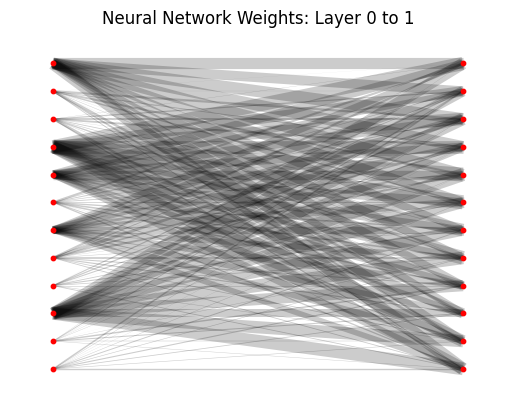

In [7]:
W = reg.coefs_
b = reg.intercepts_ 
graph_layer_weights(W,0)

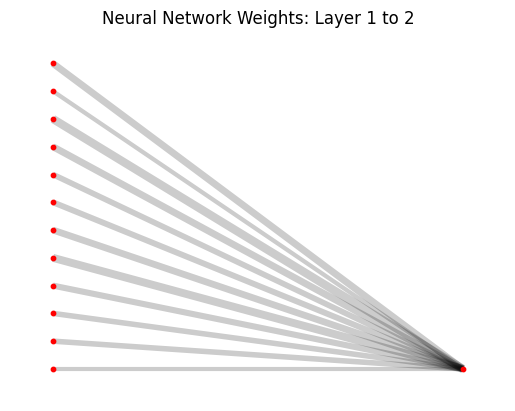

In [8]:
graph_layer_weights(W,1)

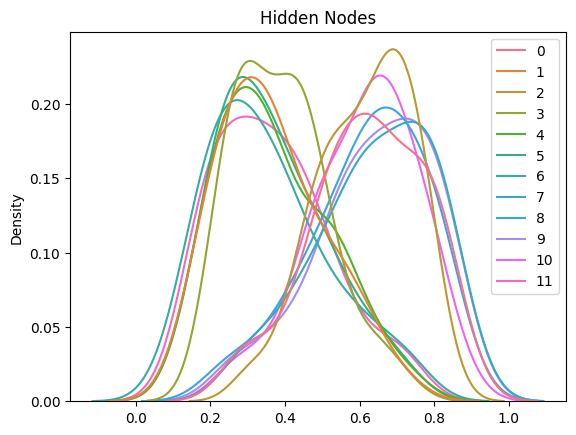

In [9]:
## NN prediction:
z = a(X_test@W[0]+b[0].T) # Broadcasting trick
sns.kdeplot(z).set(title='Hidden Nodes')
plt.show()


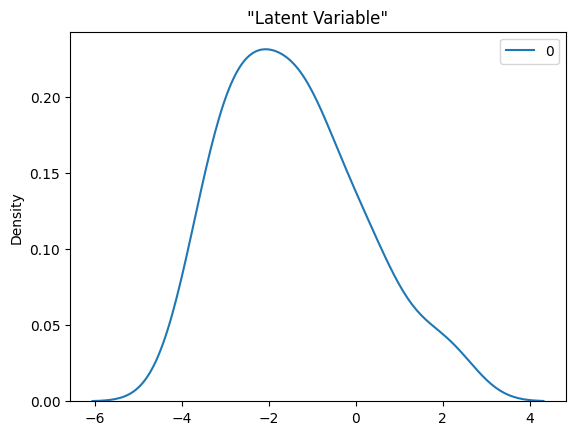

In [10]:
s =  z@W[1] + b[1]
sns.kdeplot(s).set(title='"Latent Variable"')
plt.show()

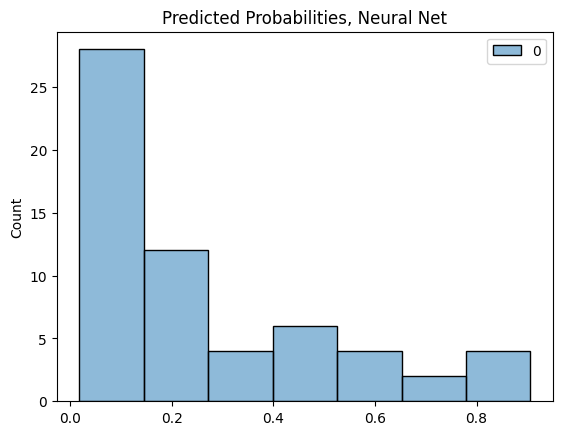

In [11]:
p_hat_NN = 1/(1+np.exp(-s))
sns.histplot(p_hat_NN).set(title='Predicted Probabilities, Neural Net')
plt.show()

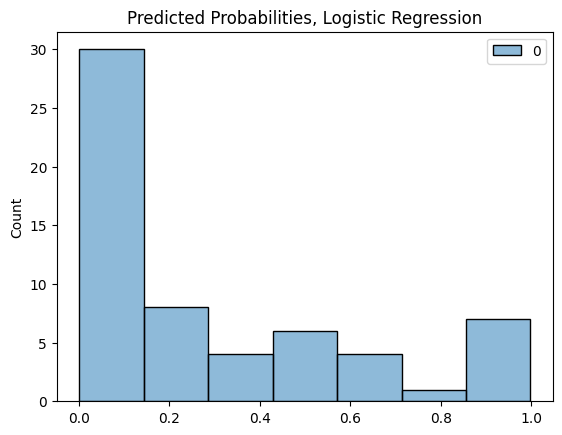

In [12]:
sns.histplot(p_hat_LR).set(title='Predicted Probabilities, Logistic Regression')
plt.show()

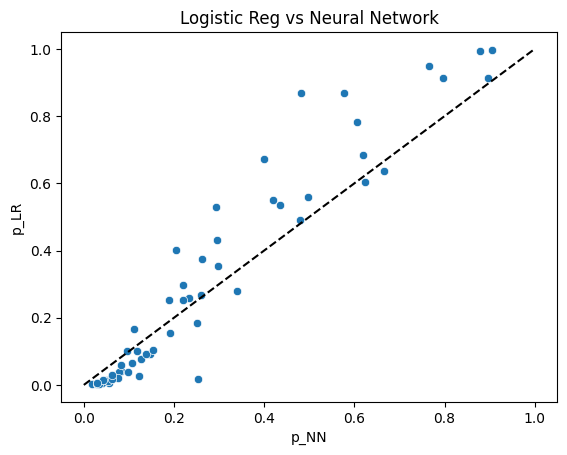

In [13]:
gdf = pd.DataFrame( {'p_NN':p_hat[0].to_numpy(),
                     'p_LR':p_hat_LR[0].to_numpy()} )

sns.scatterplot(data = gdf, x='p_NN', y = 'p_LR').set(title='Logistic Reg vs Neural Network')
plt.plot((0,1),(0,1),'k--')

## How Many Hidden Nodes
- We can use the train/test split: 
    1. Train the network on the training data and evaluate its performance on the test data, for a range of values for $K$, the number of hidden nodes
    2. Pick the value that maximizes accuracy on the test set
- There is not a firm mathematical answer to this question, and we'll see other answers later in class

In [14]:
K_max = 100 # Maximum number of nodes

acc = [] # Accuracy on test set
acc_train = [] # Accuracy on training set

for k in np.arange(1,K_max+1,3):#np.arange(1, K_max+1, 3):
    # Fit neural network:
    reg = MLPClassifier(solver = 'adam',
                        hidden_layer_sizes=(k),
                        activation='logistic',
                        max_iter = 2000)
    reg = reg.fit(X_train,y_train)
    acc.append( reg.score(X_test,y_test) )
    acc_train.append( reg.score(X_train,y_train) )

<Axes: >

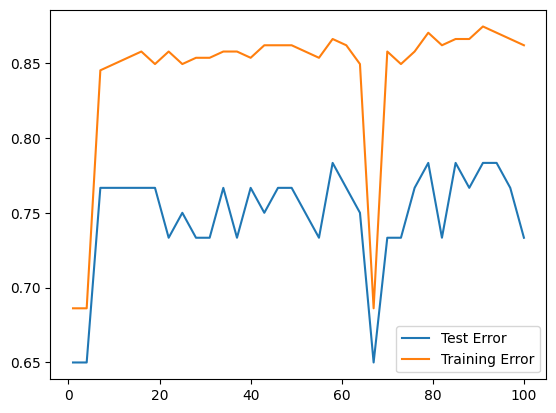

In [15]:
sns.lineplot(x=  np.arange(1,K_max+1,3), y = acc, label='Test Error')
sns.lineplot(x= np.arange(1,K_max+1,3),y=acc_train, label='Training Error')

In [16]:
reg = MLPClassifier(solver = 'adam',
                        hidden_layer_sizes=(18),
                        activation='logistic',
                        max_iter = 2000)
reg = reg.fit(X_train,y_train)
print( 'Accuracy: ', reg.score(X_test,y_test) )


Accuracy:  0.75


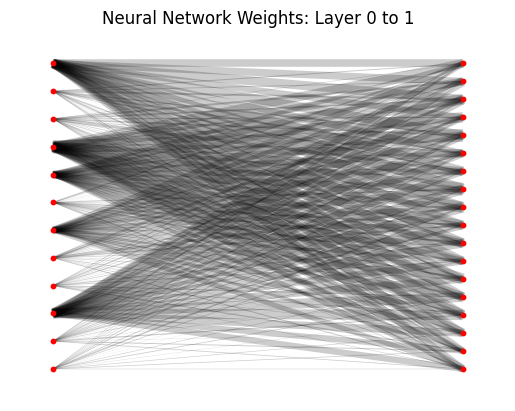

In [17]:
W = reg.coefs_
b = reg.intercepts_ 
graph_layer_weights(W,0)

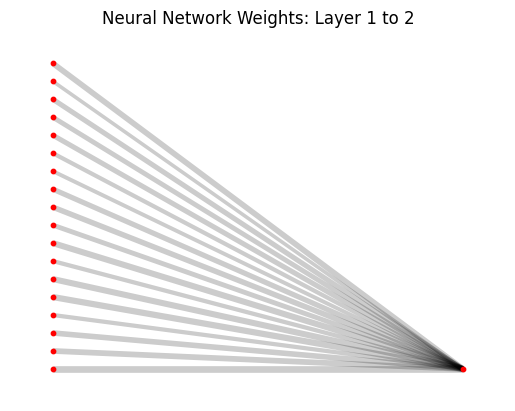

In [18]:
graph_layer_weights(W,1)

## One Layer is All You Need... For Predictive Analytics (In Theory)
- Deep Learning -- neural networks with three or more layers -- are all the rage, but those are typically for complex data (images, speech, time series)
- For our setting of predictive analytics, this is pretty astonishing:
    - Kolmogorov-Arnold Representation Theorem (1957): If $f$ is a continuous function taking a variable $x = (x_1, x_2, ..., x_K)$ into a real number $y$, then $f$ can be written in the form
$$
f(x) = \sum_{i=0}^{2K} g_i \left( \sum_{j=1}^{K} h_{ij}(x_j) \right).
$$
where each $g_i$ and $h_{ij}$ function are continuous.
- So for each dimension $i$, you have $K$ functions $h_{ij}(x_j)$: This is like $x_j$'s
- This looks suspiciously like a neural network; other researchers have shown that specific neural network architectures can capture particular classes of functions
- So if you are just trying to learn $f(x)$, it suffices to consider non-linear sums of non-linear functions of each variable separately that indexed by each of the input variables

## But People Love Adding Layers
- So we can understand deep neural networks **recursively**:
    1. There is an input layer, $x$
    2. The first layer outputs $z^1 = a(b^0 + W^0 \cdot x)$
    3. Each subsequent layer generates more hidden node values, $z^k = a(b^{k-1} + W^{k-1} \cdot z^{k-1})$
    4. The output layer is the activation function applied to the final hidden layer, $a(b^K + w^K \cdot z^K)$
- It's alternating linear algebra with non-linear activation functions:
$$
\hat{y}_{NN}(x) = a(b^K + w^K \cdot a( b^{K-1} + W^{K-1} \cdot a( ... a(b^0 + W^0 \cdot x))))
$$

In [19]:
from sklearn.neural_network import MLPClassifier

#reg = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(50,25,10),activation='logistic',alpha=.1)
reg = MLPClassifier(solver = 'adam',
                    hidden_layer_sizes=(25,7),
                    max_iter = 2000,
                    activation='relu')

reg.fit(X_train,y_train)
print('Accuracy: ', reg.score(X_test,y_test))

Accuracy:  0.75


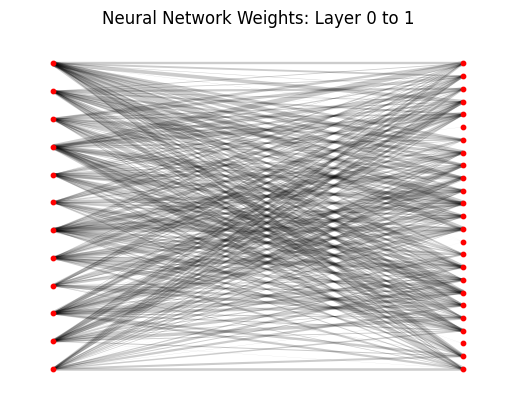

In [20]:
W = reg.coefs_
b = reg.intercepts_ 
graph_layer_weights(W,0)

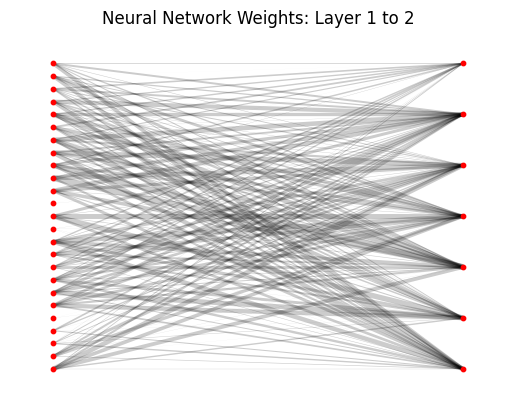

In [21]:
graph_layer_weights(W,1)

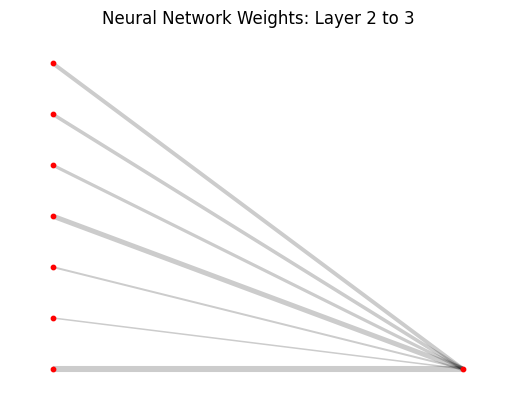

In [22]:
graph_layer_weights(W,2)

# Regression Example: Car Prices

- Let's regress car prices on car attributes 
- For regression, the output layer is typically just a linear model:
\begin{alignat*}{2}
\hat{y}(x)_{NN} &=& \underbrace{b^1}_{\text{Bias}} + \underbrace{\left[ \begin{array}{cccc} w_{1}^1 \\ w_{2}^1  \\ \vdots  \\ w_{K}^1 \end{array} \right]}_{\text{Weights}} \cdot \underbrace{\left[ \begin{array}{c} z_1^0(x) \\ z_2^0(x) \\ \vdots \\ z_K^0(x) \end{array}\right] }_{\text{Hidden Layer}} \\
&=&  b^1 + w^1 \cdot z^0(x)
\end{alignat*}
where $z^1$ are the hidden values of the single hidden layer


- But, remember, the non-linear activation function gets applied to the input layer:
\begin{alignat*}{2}
z^0(x) &=&   \underbrace{a}_{\text{Activation Function}} \left( \underbrace{b^0}_{\text{Bias}} + \underbrace{\left[ \begin{array}{cccc} w_{11}^0 & w_{12}^0 & \dots & w_{1L}^0 \\ w_{21}^0 & w_{22}^0 & \dots & w_{2L}^0 \\ \vdots & \vdots & \ddots & \vdots \\ w_{K1}^0 & w_{K2}^0 & \dots & w_{KL}^0 \end{array} \right]}_{\text{Weights}} \cdot \underbrace{\left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_L \end{array}\right] }_{\text{Input Layer}}\right) \\
&=& a( b^0 + W^0 \cdot x) 
\end{alignat*}
- Substituting the hidden layer into the output layer yields:
$$
\hat{y}(x)_{NN} = b^1 + w^1 \cdot a( b^0 + W^0 \cdot x)
$$

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

cars = pd.read_csv('./data/USA_cars_datasets.csv') # landmine data

y_cars = np.arcsinh(cars['price'])
X_cars = cars.drop('price',axis=1)
X_cars['age'] = np.max(X_cars['year']) - X_cars['year']
X_cars.head()

cat_vars = ['brand', 'model', 'color',]
num_vars = ['mileage','age']

dummies = pd.DataFrame()
for var in cat_vars:
    tdf = pd.get_dummies( X_cars[var],dtype=int )
    dummies = pd.concat([dummies,tdf], axis=1)

X = pd.concat( [dummies,X_cars.loc[:,num_vars]],axis=1)
X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cars, test_size=0.2, random_state=100)

In [24]:
K_max = 200
acc = []
acc_train = []

grid = np.arange(5,K_max+1,20)

for k in grid:#np.arange(1, K_max+1, 3):
    # Fit neural network:
    reg = MLPRegressor(solver = 'adam',
                        hidden_layer_sizes=(k),
                        activation='logistic',
                        max_iter = 5000)
    reg = reg.fit(X_train,y_train)
    acc.append( reg.score(X_test,y_test) )
    acc_train.append( reg.score(X_train,y_train) )

<Axes: >

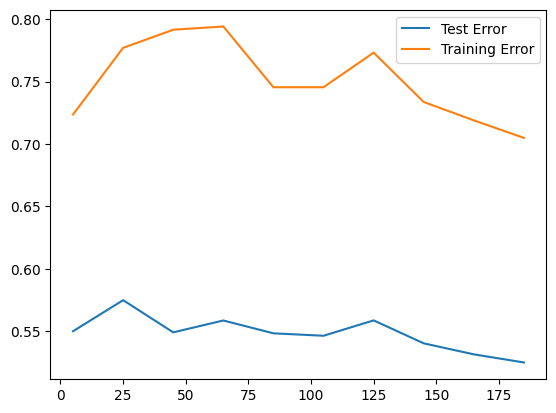

In [25]:
sns.lineplot(x=  grid, y = acc, label='Test Error')
sns.lineplot(x= grid, y=acc_train, label='Training Error')

In [26]:
reg = MLPRegressor(solver = 'adam', 
                    hidden_layer_sizes=(17), 
                    activation='relu', 
                    max_iter=5000) # .75
reg.fit(X_train,y_train)
reg.score(X_test,y_test) # R^2 score

0.402366556381065

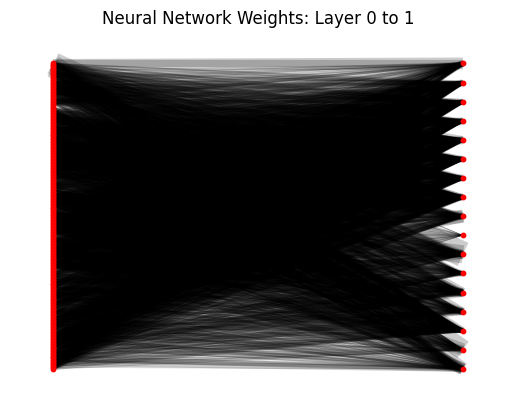

In [27]:
W = reg.coefs_
b = reg.intercepts_ 

graph_layer_weights(W,0)

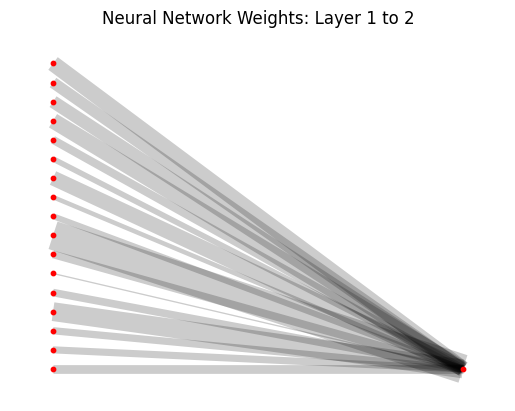

In [28]:
graph_layer_weights(W,1)

# Multi-Label Classification Example: Landmines

- There are five kinds of landmines, which must be disarmed in different ways
- There are three predictor/feature/covariates available: voltage, height, and soil
- We want to build a model to predictive model to aid people in decision-making when facing these devices
- **Since there are 5 possible landmines, we actually have 5 nodes in our output layer, rather than just one, as with regression and binary classification**

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

mdf = pd.read_csv('./data/land_mines.csv') # landmine data

y_mines = mdf['mine_type']
X_mines = mdf.drop('mine_type',axis=1)
X_mines.head()

X_train, X_test, y_train, y_test = train_test_split(
    X_mines, y_mines, test_size=0.2, random_state=100)

In [30]:
acc_train = []
acc = []
grid =  np.arange(10, 2001, 50)
for k in grid:
    reg = MLPClassifier(solver = 'adam', 
                        hidden_layer_sizes=(k), 
                        activation='relu', 
                        max_iter=5000) # .75
    reg.fit(X_train,y_train)
    acc.append( reg.score(X_test,y_test) )
    acc_train.append( reg.score(X_train,y_train) )

<Axes: >

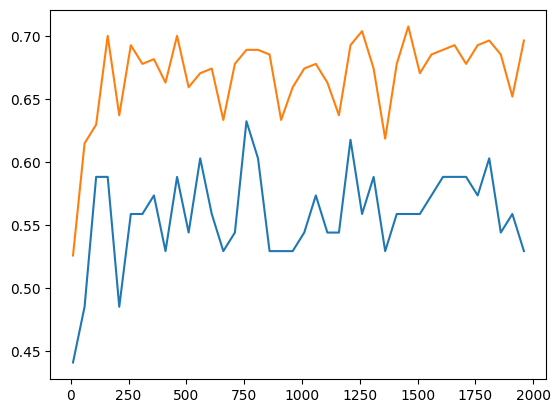

In [31]:
sns.lineplot(x=grid, y=acc)
sns.lineplot(x=grid, y=acc_train)

In [32]:
reg = MLPClassifier(solver = 'adam', 
                    hidden_layer_sizes=(300), # Output: 5
                    activation='relu', 
                    max_iter=5000) 
reg.fit(X_train,y_train)
print( 'Accuracy: ', reg.score(X_test,y_test) )

pd.crosstab(reg.predict(X_mines),y_mines)

Accuracy:  0.5294117647058824


mine_type,1,2,3,4,5
row_0,,,,,
1,66,0,4,10,8
2,0,66,3,2,0
3,2,2,29,8,16
4,1,2,4,26,9
5,2,0,26,20,32


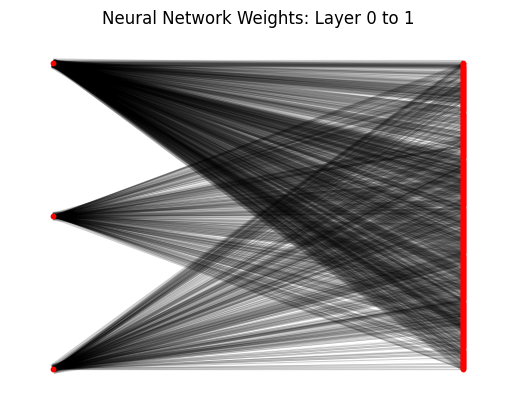

In [33]:
W = reg.coefs_
b = reg.intercepts_ 
graph_layer_weights(W,0)

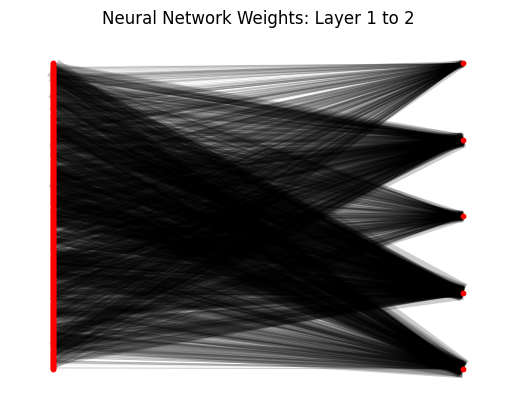

In [34]:
graph_layer_weights(W,1)

In [35]:
# Fit MLP Classifier:
reg = MLPClassifier(solver = 'adam', 
                    hidden_layer_sizes=(100,40,20), 
                    activation='relu', 
                    max_iter=5000) # .75

reg.fit(X_mines,y_mines)
print('Accuracy: ', reg.score(X_mines,y_mines))

Accuracy:  0.7248520710059172


In [36]:
pd.crosstab(reg.predict(X_mines),y_mines)

mine_type,1,2,3,4,5
row_0,,,,,
1,68,0,4,1,6
2,0,68,1,1,0
3,0,0,37,5,21
4,0,2,2,40,6
5,3,0,22,19,32


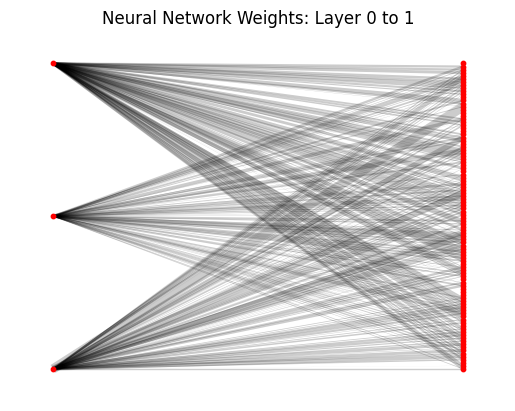

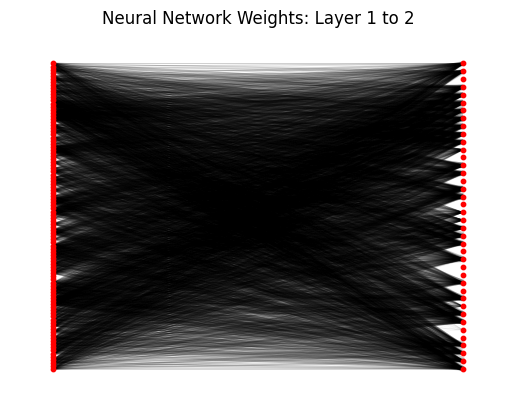

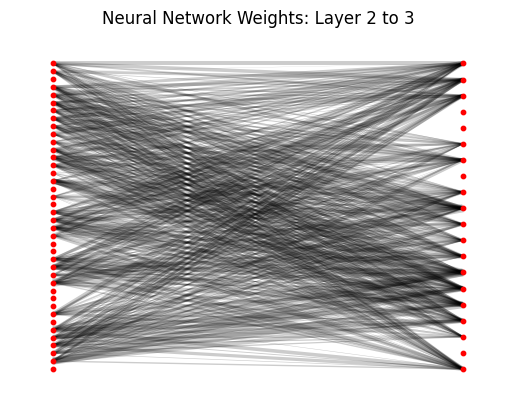

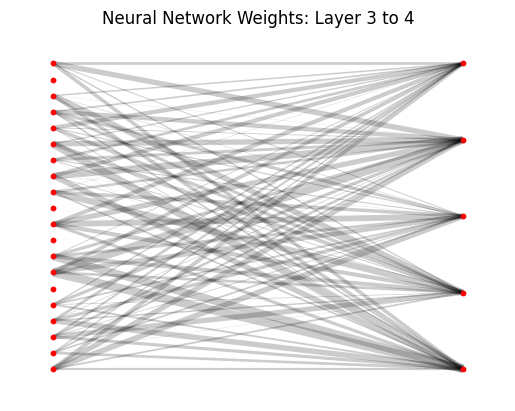

In [37]:
W = reg.coefs_
b = reg.intercepts_ 

for ell in range(len(W)):
    graph_layer_weights(W,ell)

## Hard Classification and Softmax
- How do we make predictions?
- We can do hard classification, and pick the output node with the highest value
- We can do soft classification, where we take the value of each output node $k$ as $v_k$, and compute
    $$
    pr[k|x] = \dfrac{e^{v_k}}{\sum_{j=1}^K e^{v_j}}
    $$
- This is called **softmax**, and randomizes over the outputs $k=1,...,K$ the same way a multinomial logit does
- The outcome $k$ with the largest $v_k$ will be most likely followed by all of the other alternatives
- This is a really common trick to turn hard numbers into a randomization over options

# Architecture Questions

## Key Choices

OK, so, you're ready to go. Every package will ask you to specify at least four things:

- 1. What **loss function**? Usually SSE for regression, cross entropy for classification
- 2. What **activation function**? The logistic/sigmoid is a classic, but ReLU is popular
- 3. How many **hidden layers** and **hidden nodes**?
- 4. Which **optimizer**? Stochastic Gradient Descent is popular, but there are other options

## 1. Common Loss Functions
- Binary cross-entropy/log-loss, `binary_crossentropy`, for 0/1 classification: Letting $\hat{p}_i$ be the predicted probability that observation $y_i$ takes the value 1, 
$$
L_{bce} = - \dfrac{1}{N} \sum_{i=1}^N y_i \log \left( \hat{p}_i \right) + (1-y_i) \log \left( 1 - \hat{p}_i\right)
$$
- Categorical cross-entropy/log-loss, `categorical_crossentropy`, for multi-label classification: Letting $\hat{p}_{ik}$ be the predicted probability that observation $i$ is in category $k$, 
$$
L_{cce} = - \dfrac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log \left( \hat{p}_{ik} \right)
$$
- Mean-squared error, for regression: Letting $\hat{y}_i$ be the predicted value for observation $i$,
$$
L_{mse} = \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

## 2. Activation Functions
- The logistic function is a nice place to start because it ties together our linear models discussions with the story about neural networks mimicing human brains, but people often use other models of neurons
- Just to show you what they look like, standards include:
    - **Rectified linear unit** or ReLU: $a(z) = \max \{ z, 0 \} $
    - **Sigmoid** or **Logistic**: $a(z) = 1/(1+\exp(-z))$
    - **Leaky ReLU**: $a(z) = \max\{.9z, z\}$
    - **Exponential Linear Unit**: $a(z) = \begin{cases} z, & z>0\\ e^z-1, & z < 0 \end{cases}$
    - **Tanh**: $a(z) = \dfrac{e^z-e^{-z}}{e^z+e^{-z}}$
- Ultimately, this is all similar to a linear model: We have to pick all these weights, so we'll be using the derivative/gradient to search for weights that provide the best fit
- Why switch to something else? For every large values of the latent variable, the sigmoid/logistic function flattens out, and this can be inconvenient for training models

- The popular choice right now is ReLU, $a(z) = \max \{z, 0 \}$ 
- Why? 
    - It is non-linear, so that it works as an activation function, but it is simple to compute
    - Unlike the logistic distribution, the slope never goes to zero ("vanishing gradients" problem)

[Text(0.5, 1.0, 'ReLU Activation'), Text(0.5, 0, 'z'), Text(0, 0.5, 'a(z)')]

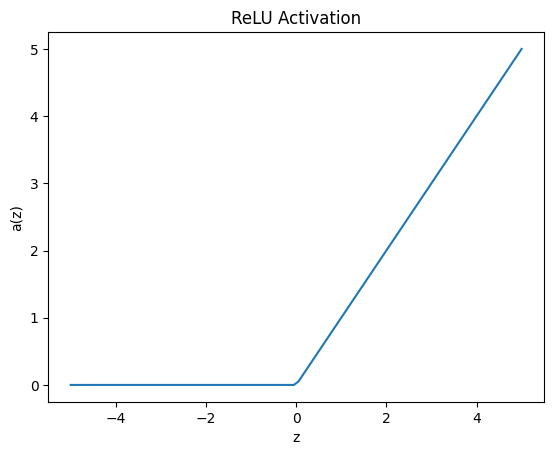

In [38]:
Z = np.linspace(-5.0,5.0,100)
Y = np.maximum(Z,0)
sns.lineplot(x=Z,y=Y).set(title='ReLU Activation',xlabel='z',ylabel='a(z)')

## 3. Hidden Layers/Nodes
- How many hidden layers? It depends
- For the kinds of straightforward prediction problems we've looked at in class, probably not more than two; there are analyses and rules-of-thumb that people have developed that suggest two is fine for prediction-type tasks 
- A popular aNN in computer vision (convolutional neural networks) has three layers, as a matter of mathematical necessity (a CNN must have 3 layers to work)
- More than three layers qualifies as "deep learning," which might surprise you
- The power of generative artificial intelligence and large language models comes from having a very deep neural network: An earlier version of ChatGPT had 96 hidden layers and 1.75 billion parameters, which cost about 100k to fit (and about 700k per day to run for users)
- I downloaded Llama 3.3, which has 70 bn parameters

## 4. Optimizers
Somewhat in order of popularity:
- `adam`: Variation on stochastic gradient descent.
- `sgd`: Stochastic Gradient Descent. Does gradient descent in batches, randomly splitting the sample to avoid using too much data at once.
- `lbfgs`: Limited-memory Broyden Fletcher Goldfarb Shanno. Classical method. Approximates the optimal learning rate using just gradient calculations. 

## Using SciKit-Learn
- Always maxmin normalize your input variables
- Supervised:
    - Regression: `sklearn.neural_network.MLPRegressor(activation='relu', hidden_layers=(100,), solver='adam', max_iter=200, random_state=None)`
    - Classification: `sklearn.neural_network.MLPClassifier(activation, hidden_layers=(100,), solver='adam', max_iter=200, random_state=None)`
- Unsupervised: 
    - Restricted Boltzman Machine: `sklearn.neural_network.BernoulliRBM(n_components=256,learning_rate=0.1,n_iter=10,random_state=None)`
- You pass a tuple of layer sizes to `hidden_layers`, simultaneously determining the number of hidden layers as well

## Other Packages for aNN Analysis
- There are a variety of packages for neural network analysis (from least to most complex):
    - SciKit: No GPU support, but specifying layer/node architecture is just a tuple
    - Keras/Tensorflow: GPU support, Keras is a SciKit-style API to TensorFlow so it's reasonably easy to get started. 
    - PyTorch: GPU support, very flexible, but even simple neural networks require a dozen lines of boilerplate code
- The GPU-accelerated aNN support is probably the main reason to use Python, not Sci-Kit
- PyTorch/TensorFlow also give you complete control over the network architecture: Using different activation functions in different layers, not dense connections from layer to layer, etc.
- In general: PyTorch is more innovative and flexible, TensorFlow is more stable and useful for deployment

## Common Misconceptions
- More nodes and layers does not necessarily mean better results (We got an accuracy of .7450 with the neural net with 3,785 parameters... and .7394 with the vanilla logistic regression with 61 parameters --- that's comical)
- The number of nodes in each hidden layers shouldn't necessarily decrease from input to output: Some architectures shrink down and then expand (e.g. variational auto encoder)
- Neural networks aren't guaranteed to do better than, say, a random forest or the LASSO --- in a lot of situations they have be very hard to fit

# Backpropogation and Gradient Descent

## Backpropogation
- We have a loss function, and we have a very highly parameterized model
- How do we optimize it?
- Gradient descent offers a way of updating the parameters (biases $b$ and weights $W$)
- But how do we compute the gradient?
- The main idea is: You need an algorithm that computes it layer by layer, rather than taking one derivative all at once

## Key Tool: The Chain Rule
- Let's recall the chain rule: $D_x f(g(x)) = f'(g(x)) g'(x)$. Why?
- Recall the mean value theorem: $r(x_1) = r(x_0) + (x_1-x_0)r'(z)$, where $z$ is between $x_0$ and $x_1$.
- From two applications of the mean-value theorem,
\begin{alignat*}{2}
\lim_{h \rightarrow 0} \dfrac{f(g(x+h))-f(g(x))}{h} &=& \lim_{h \rightarrow 0} \dfrac{f(\underbrace{g(x)+h g'(z_h)}_{\text{MVT}})-f(g(x))}{h} \\
&=& \lim_{h \rightarrow 0} \dfrac{ \underbrace{f(g(x))+f'(w_h)hg'(z_h)}_{\text{MVT}}-f(g(x))}{h} \\
&=& \lim_{h \rightarrow 0} \dfrac{f'(w_h)hg'(z_h)}{h} \\
&=& \lim_{h \rightarrow 0} f'(w_h)g'(z_h) \\
&=& f'(y)g'(x)
\end{alignat*}
where $y=g(x)$ is the "hidden value" between $x$ and $f(y)$.
- The Mean Value Theorem is the most important tool in calculus; if you only have the MVT, you can recover anything else

## Iterating the Chain Rule
- What if we instead had a sequence of functions $f_0, f_1, ..., f_n$ applied iteratively to $x$ and the subsequent outputs:
$$
g(x) = f_n( f_{n-1}( f_{n-2}(...f_1(f_0(x)))))
$$
- What would $g'(x)$ be? How could we compute it efficiently?
- From iterated applications of the chain rule, we get
$$
g'(x) = f_n'(z_{n-1}) \times f_{n-1}'(z_{n-2}) \times ... \times f_1'(z_0) \times f_0'(x)
$$
where the **hidden values** $z_\ell$ satisfy $z_{\ell} = g_\ell(z_{\ell-1})$.


## Computation
- If we wanted to compute this in practice, we'd have to do two things:
    1. Compute the sequence of hidden values in a **forward pass**: $z_0 = f^0(x), z_1=f^1(z^0), ..., z_{n-1} = f^{n-1}(z^{n-1})$
    2. Compute the sequence of derivatives **backwards** from the final layer, evaluated at the appropriate hidden values computed during the forward pass: 
        - First, compute $a_n = f_n'(z_{n-1})$
        - Then, compute $a_{n-k} = a_{n-k+1} \times f_{n-k}'(z_{n-k-1})$ until you reach $k=n$

## Example: Back-Prop
- Suppose $ x = 3 $ and
$$ f_0(x) = x^2 = z^0, \quad f_1(z^0) = \ln(z^0) = z^1, \quad f_2(z^1) = 2 z^1 - 12 = y$$
- In the forward pass, we compute $z^0 = 9$, $z^1 = 2.1972$, $y= -7.6055$.
- The backwards pass, we compute 
    - $f_2'(z^1) = 2 = a_2$
    - $f_1'(z^0) = 1/z^0 = 1/9$, and $a_1 = a_2 \times 1/z^0 = 2/9$
    - $f_0'(x) = 2 \times x$, and $a_0 = a_1 \times 2x = (2/9) \times 6 = 12/9$
- So our derivative is 4/3.

- Symbolic differentiation would have given
$$
f(x) = 2 \times( \ln(x^2) ) - 12
$$
and
$$
f'(x) = 2 \dfrac{1}{x^2} 2 \times x = \dfrac{4}{x}
$$
and
$$
f'(3) = \dfrac{4}{3}
$$
which is the same answer.

## Back-propagation
- This becomes harder in a multivariate setting: $f'_\ell(y_{\ell-1})$ becomes a matrix called a Jacobian that includes the derivative of the function with respect to each weight and bias across each dimension
- The sequence $0, 1, ..., n$ becomes the architecture of the neural network: We need to determine the hidden values and the associated Jacobians, then multiply it all together as we work backwards through the network architecture
- This is why the situation becomes so computationally intensive: We're computing matrix derivatives, evaluating functions, and multiplying it all together to get the gradient in order to pick new values for the weights
- This is also why PyTorch and Keras/TensorFlow (and to a lesser extent, Sci-kit) are so popular: They handle the backpropogation algorithm that computes the gradient

## Notice, it's all linear algebra
- There's non-linearity in the activation function, but all of the calculus boils down to matrix multiplication and vector addition
- This is why NVIDIA is a trillion dollar company: It makes the best hardware for doing these computations
- The advantage of PyTorch/TensorFlow is that you can write code that uses your NVIDIA GPU if you have one, using NVIDIA's CUDA software
- This massively accelerates your code
- If you do not have an NVIDIA GPU, then PyTorch will still use your CPU, but it will be much slower
- You know, the original Google algorithm was just a centuries old idea from linear algebra?

# Conclusion

## "Black Box" Models
- Linear regression is easy to interpret:
- Decision trees are easy to explain:
- Neural networks are neither

## Artificial Neural Networks
- The neural network question is, "Can you push the data further with more parameters and structure?"
- There is nothing magical about aNN: They're just a powerful and flexible structure to use to build models out of weighted compositions of linear models, and ultimately very similar to other tools presented in class (in the words of a lot of stats people, "They're just nested nonlinear regressions!@!!!")
- You can see why aNNs have a reputation for being "black boxes": We don't have nearly as much intuition for how they predict like, say, linear models, or intuition for how they are built like, say, trees
- The folk wisdom is that the aNN "learns the structure" of the relationship between $y$ and $x$ by creating new variables in the hidden layers, so that it automatically does feature engineering for you, unlike in, say, a linear model, where the only features that appear are the ones you build
- But aNN have accomplished a lot, and continue to be a source of innovation in ML
- At this point, you're ready to embark on a lot of modern work related to machine learning, statistics, neural networks, and beyond